The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
{'0': [' GC(0) Pause Young (Normal) (G1 Evacuation Pause)', ' GC(0) Using 13 workers of 13 for evacuation', ' GC(0)   Pre Evacuate Collection Set: 0.1ms', ' GC(0)     Prepare TLABs: 0.0ms', ' GC(0)     Concatenate Dirty Card Logs: 0.0ms', ' GC(0)     Choose Collection Set: 0.0ms', ' GC(0)     Region Register: 0.1ms', ' GC(0)     Prepare Heap Roots: 0.0ms', ' GC(0)   Merge Heap Roots: 0.1ms', ' GC(0)     Prepare Merge Heap Roots: 0.0ms', ' GC(0)     Eager Reclaim (ms):       skipped', ' GC(0)     Remembered Sets (ms):     Min:  0.0, Avg:  0.0, Max:  0.0, Diff:  0.0, Sum:  0.0, Workers: 13', ' GC(0)       Merged Sparse:            Min: 0, Avg:  0.0, Max: 0, Diff: 0, Sum: 0, Workers: 13', ' GC(0)       Merged Fine:              Min: 0, Avg:  0.0, Max: 0, Diff: 0, Sum: 0, Workers: 13', ' GC(0)       Merged Coarse:            Min: 0, Avg:  0.0, Max: 0, Diff: 0, Sum: 0, Workers: 13', ' GC(0)       Dirty C

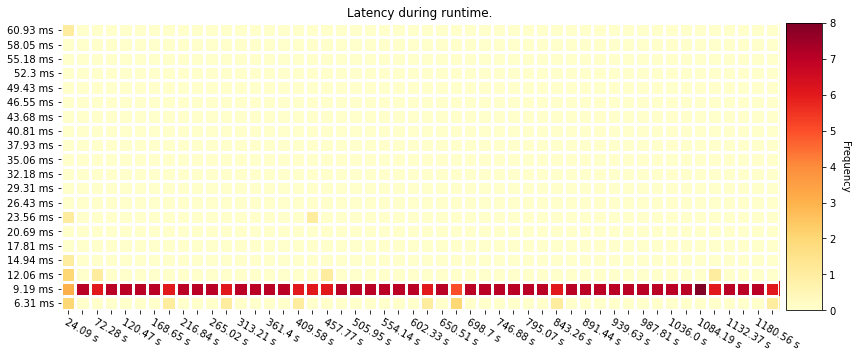

In [6]:
''' Collects information on pauses, and displays charts and metadata on pauses'''
%load_ext autoreload
%autoreload 2
from scripts import parse_log as pl
from scripts import plot_data as dplt
from scripts import compare_logs as cl


pl.setLogPath("datasets/cl_1.log")
print(pl.getGCdataSections())
# Get the pauses information from file specified above
t = pl.getPauses(create_csv = False)
dplt.plot_heatmap(t, 50, 20, False)